# import required packages

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [73]:
data=pd.read_csv(r'C:\Users\Lenovo\Downloads\bike.hour.csv')
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Data Exploration

In [74]:
data.shape

(17379, 17)

In [75]:
data.keys()

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [77]:
data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [78]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [79]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [80]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


The datasets has 

#17 attributes and 17k+ rows
#dteday is object and rest are numeric.

# Standardize Attribute Names

In [81]:
data.rename(columns={'instant':'id',
                      'dteday':'date',
                      'holiday':'is_holiday',
                      'workingday':'is_workingday',
                      'weathersit':'weather_condition',
                      'hum':'humidity',
                      'mnth':'month',
                      'cnt':'count',
                      'hr':'hour',
                      'yr':'year'},inplace=True)

In [82]:
data.shape

(17379, 17)

# Typecast Attributes

In [83]:
# pandas display data frames as tables
from IPython.display import display, HTML

In [84]:
#categorical variables
data['season'] = data.season.astype('category')
data['is_holiday'] = data.is_holiday.astype('category')
data['weekday'] = data.weekday.astype('category')
data['weather_condition'] = data.weather_condition.astype('category')
data['is_workingday'] = data.is_workingday.astype('category')
data['month'] = data.month.astype('category')
data['year'] = data.year.astype('category')
data['hour'] = data.hour.astype('category')

In [85]:
data.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Visualize Attributes, Trends and Relationships

In [86]:
# setting params
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

sns.set_style('whitegrid')
sns.set_context('talk')

plt.rcParams.update(params)
pd.options.display.max_colwidth = 600

[Text(0.5,1,'Season wise hourly distribution of counts')]

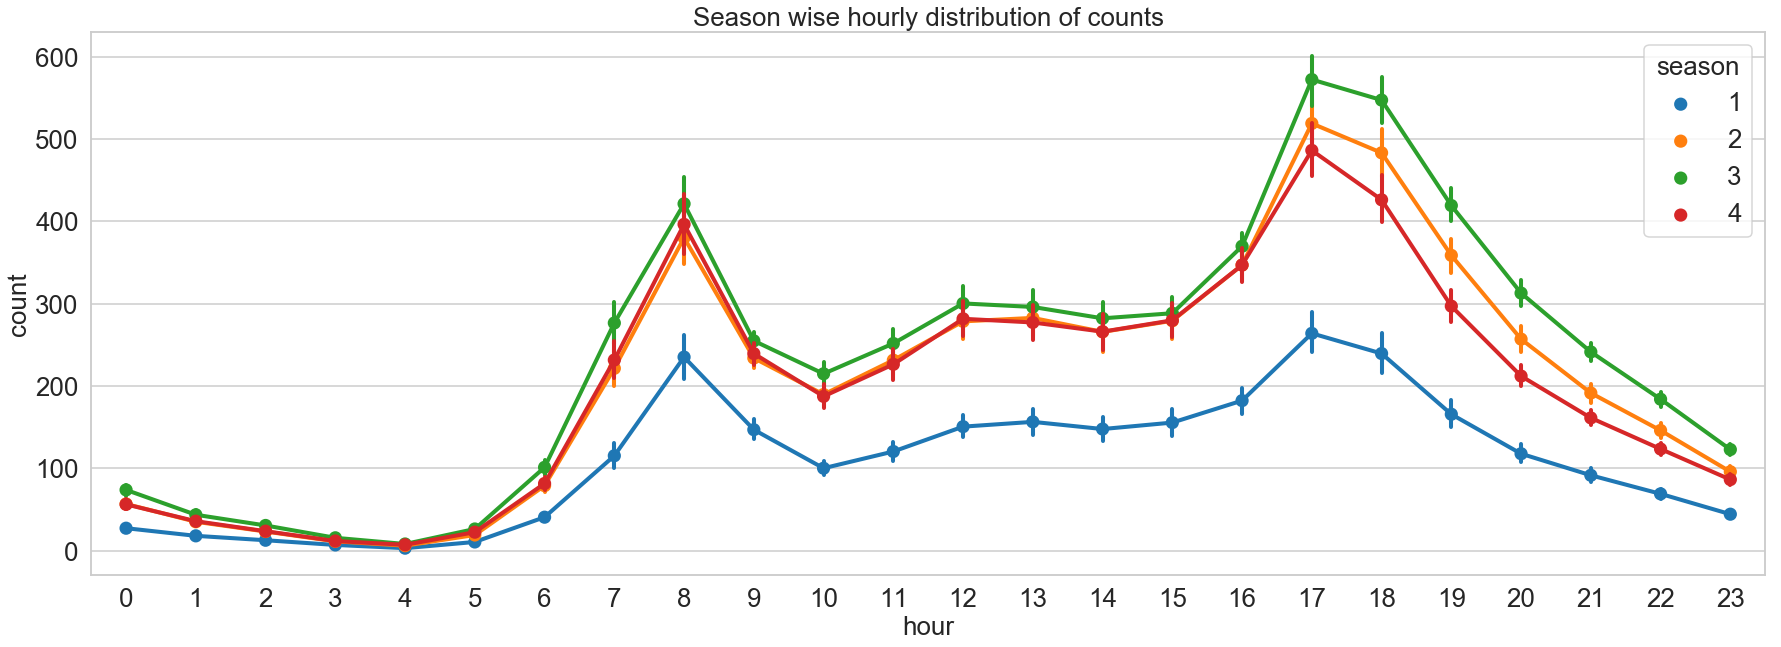

In [87]:
fig,ax = plt.subplots()
sns.pointplot(data=data[['hour',
                           'count',
                           'season']],
             x='hour',y='count',
             hue='season',ax=ax)
ax.set(title="Season wise hourly distribution of counts")

[Text(0.5,1,'Weekday wise hourly distribution of counts')]

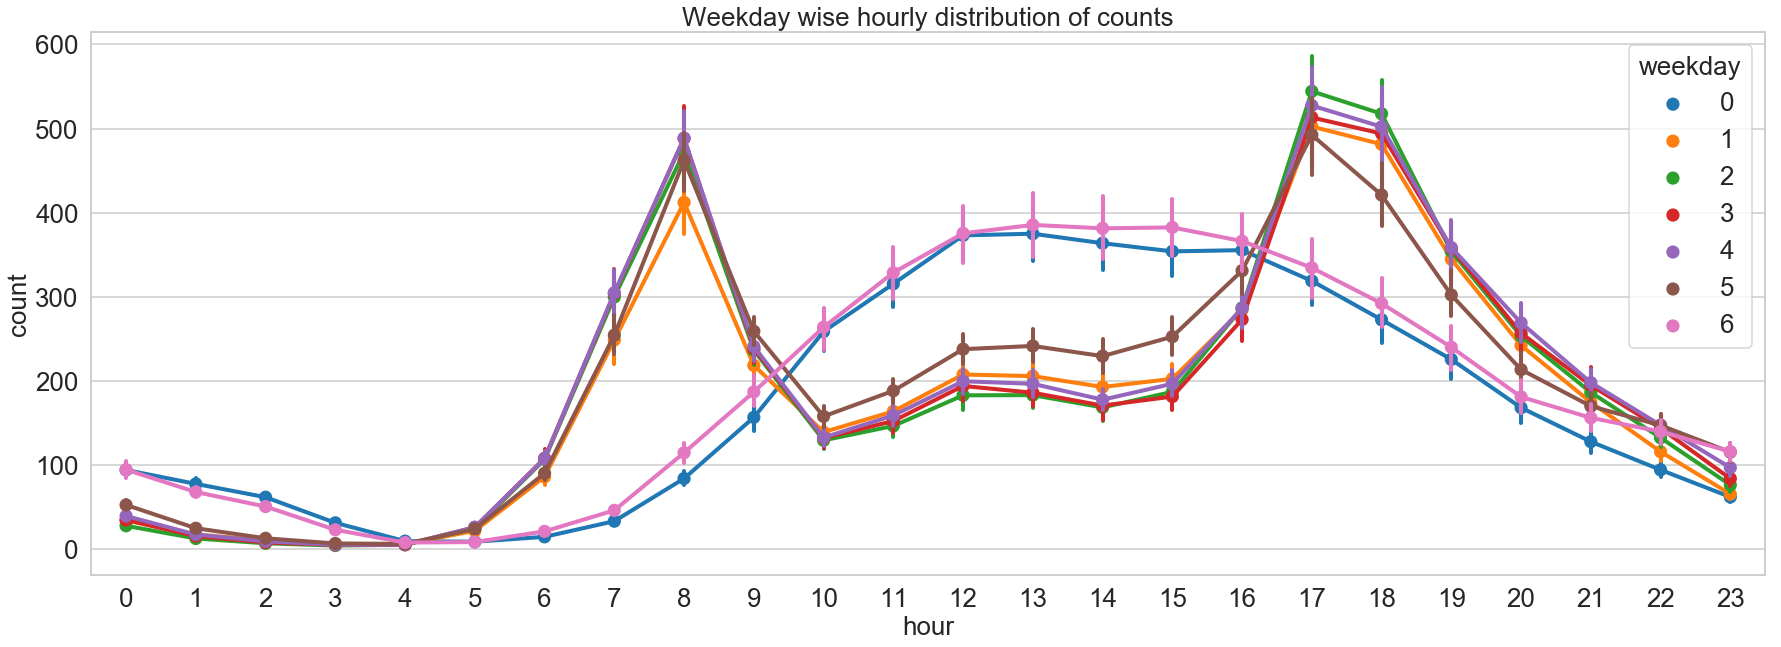

In [88]:
fig,ax = plt.subplots()
sns.pointplot(data=data[['hour','count','weekday']],x='hour',y='count',hue='weekday',ax=ax)
ax.set(title="Weekday wise hourly distribution of counts")

# Hour distribution of count

[Text(0.5,1,'Box Pot for hourly distribution of counts')]

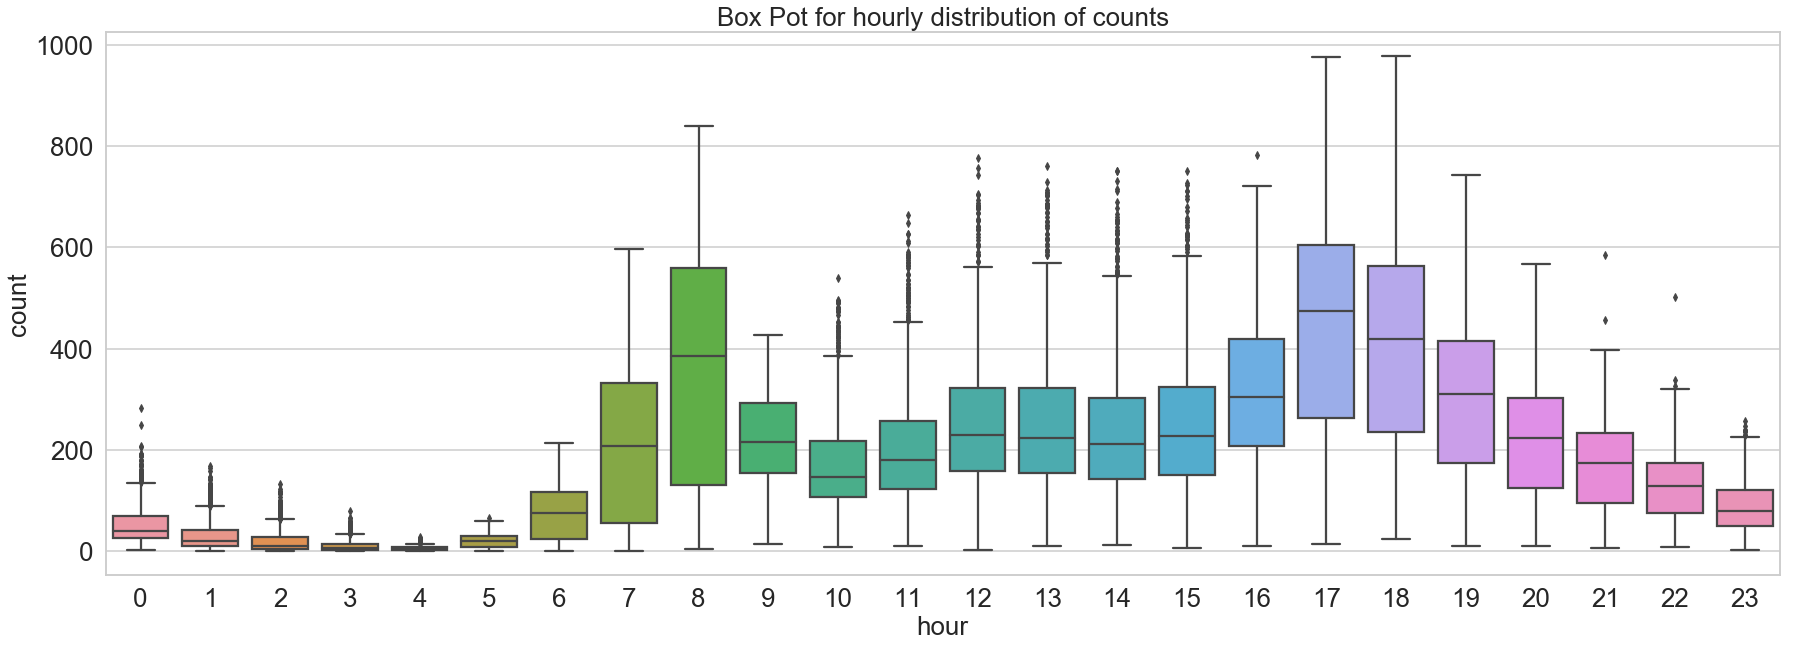

In [89]:
fig,ax = plt.subplots()
sns.boxplot(data=data[['hour','count']],x="hour",y="count",ax=ax)
ax.set(title="Box Pot for hourly distribution of counts")

# Monthly distribution of  Count

[Text(0.5,1,'Monthly distribution of counts')]

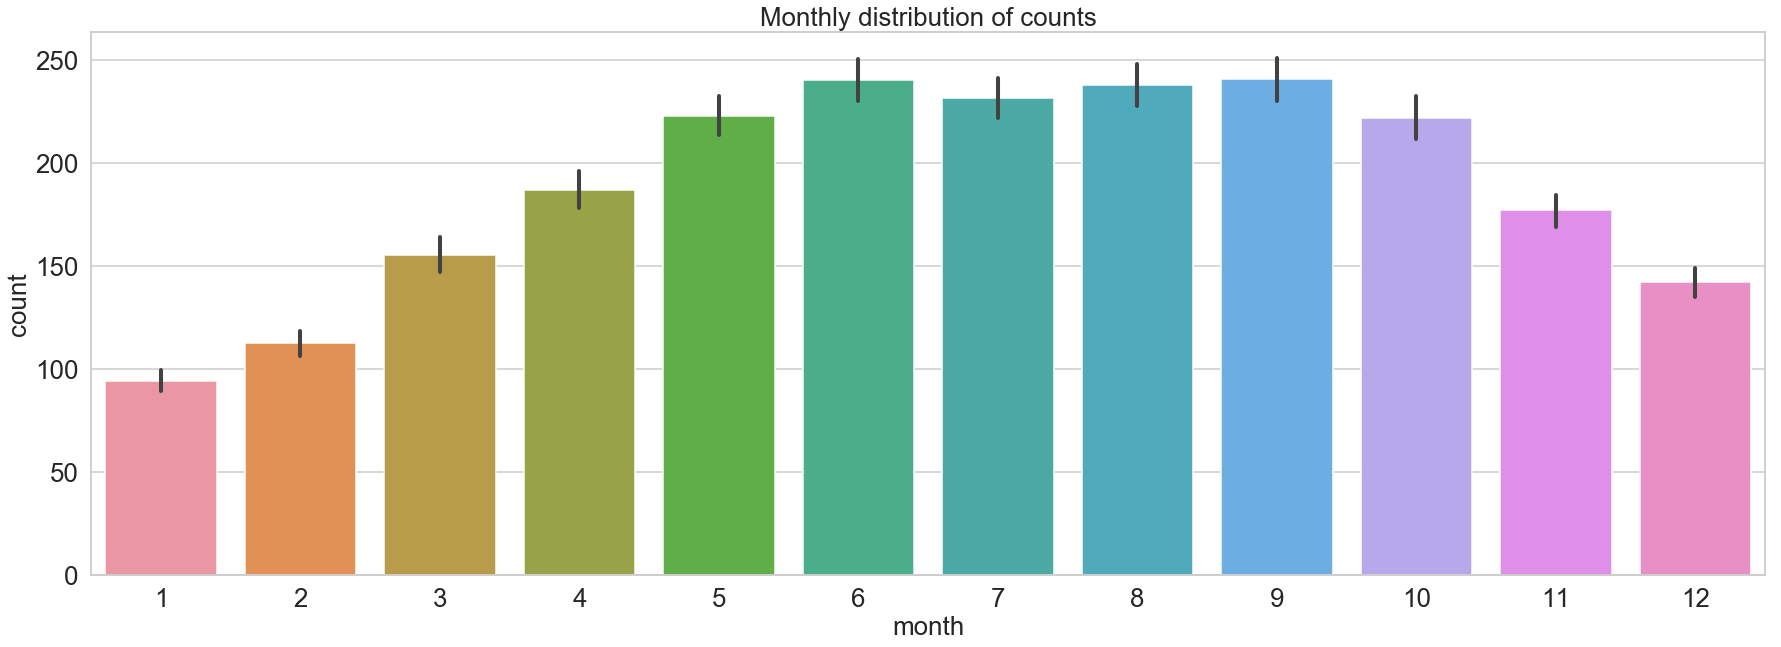

In [90]:
fig,ax = plt.subplots()
sns.barplot(data=data[['month',
                         'count']],
           x="month",y="count")
ax.set(title="Monthly distribution of counts")

Month june and sep has highest count

[Text(0.5,1,'Winter')]

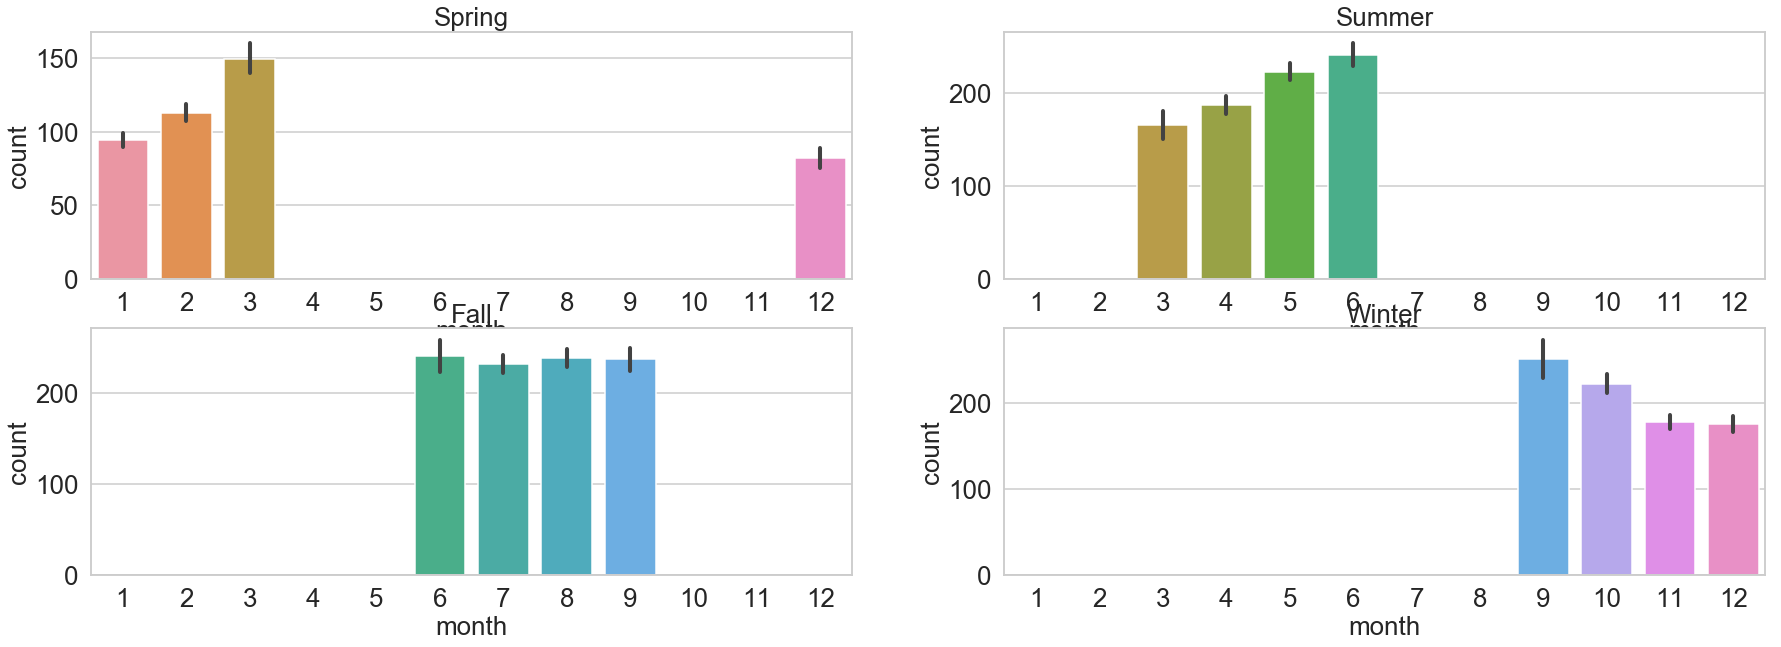

In [91]:
col_list = ['month','weekday','count']
plot_col_list= ['month','count']
spring_df = data[data.season==1][col_list]
summer_df = data[data.season==2][col_list]
fall_df = data[data.season==3][col_list]
winter_df = data[data.season==4][col_list]

fig,ax= plt.subplots(nrows=2,ncols=2)
sns.barplot(data=spring_df[plot_col_list],x="month",y="count",ax=ax[0][0],)
ax[0][0].set(title="Spring")

sns.barplot(data=summer_df[plot_col_list],x="month",y="count",ax=ax[0][1])
ax[0][1].set(title="Summer")

sns.barplot(data=fall_df[plot_col_list],x="month",y="count",ax=ax[1][0])
ax[1][0].set(title="Fall")

sns.barplot(data=winter_df[plot_col_list],x="month",y="count",ax=ax[1][1])  
ax[1][1].set(title="Winter")

# Year Wise distribution

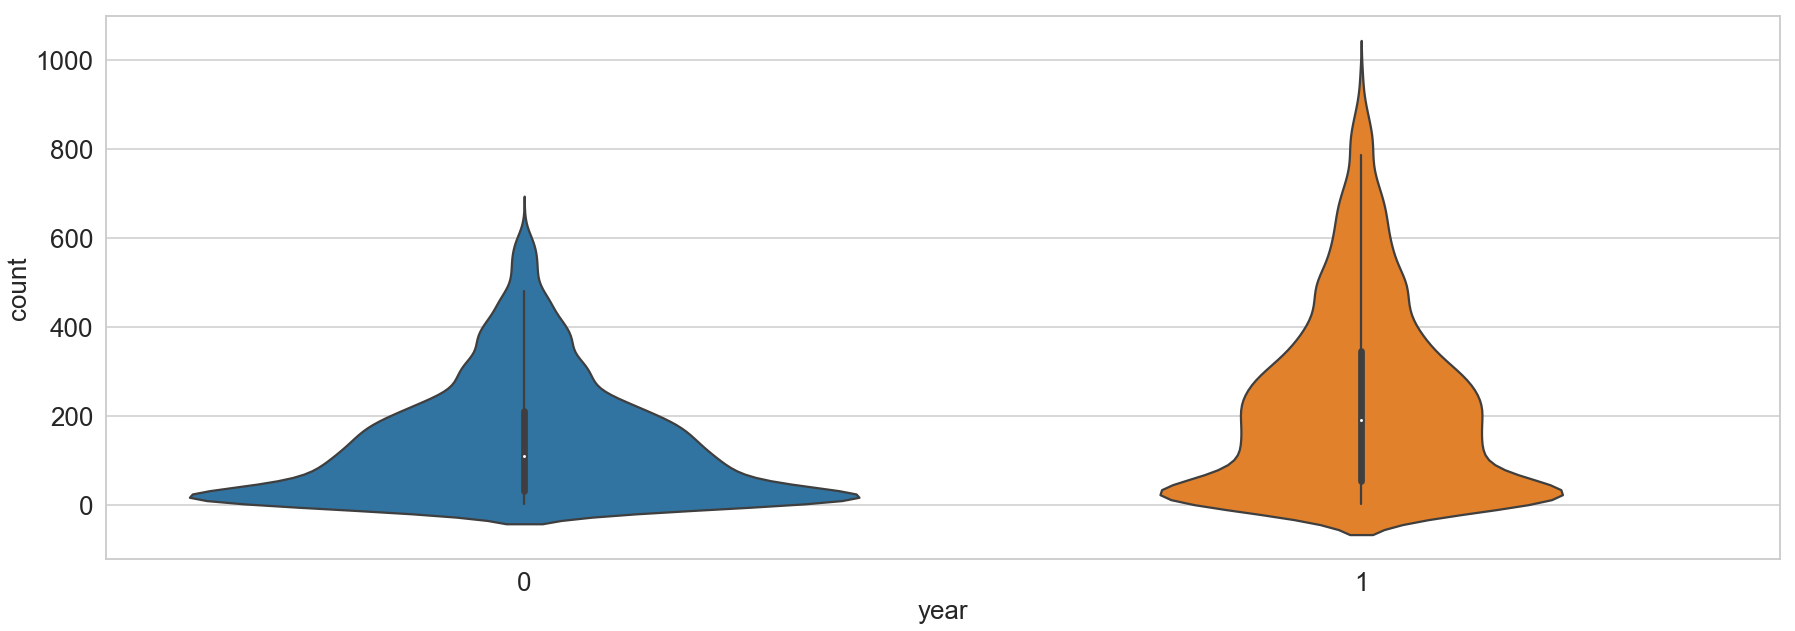

In [92]:
sns.violinplot(data=data[['year','count']],x="year",y="count")

# Working Day Vs Holiday Distribution

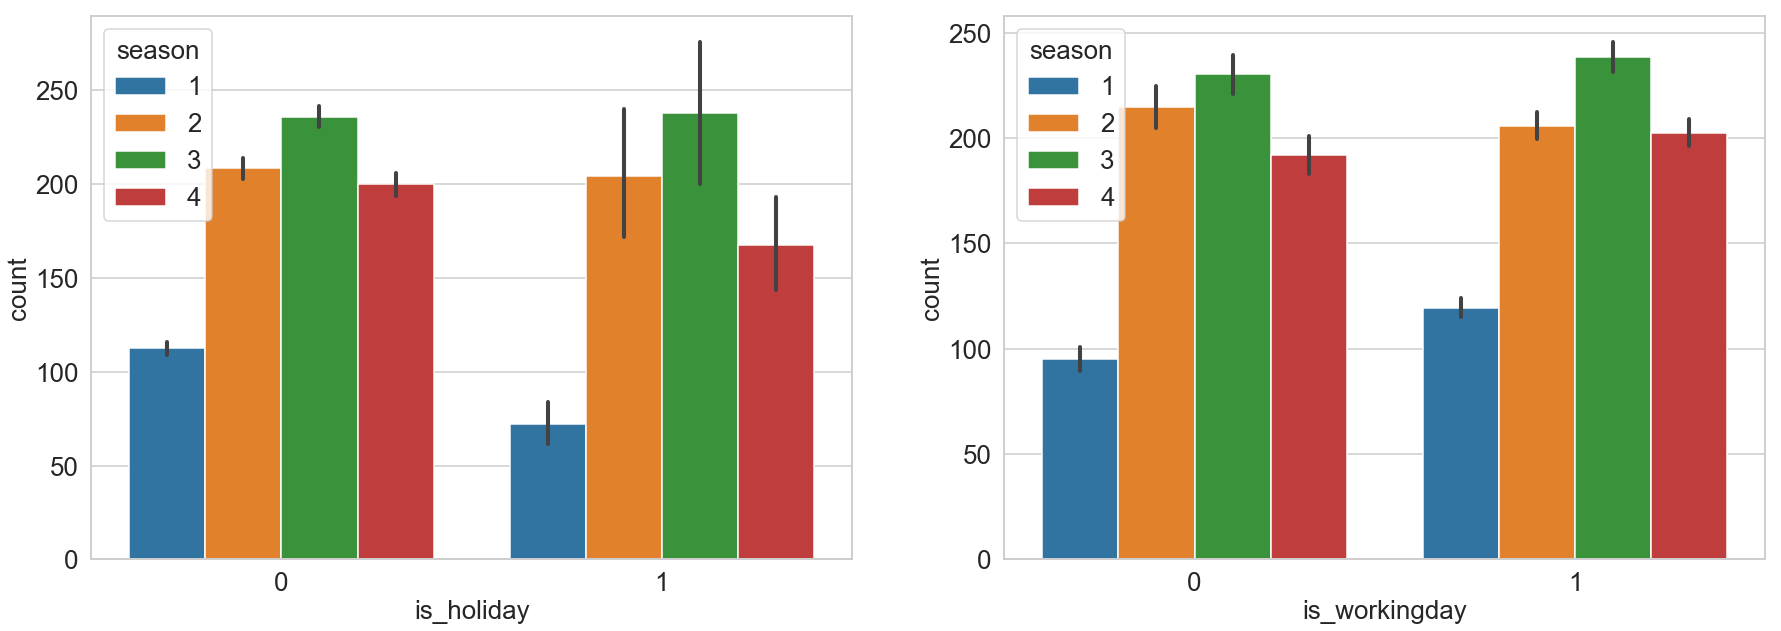

In [93]:
fig,(ax1,ax2) = plt.subplots(ncols=2)
sns.barplot(data=data,x='is_holiday',y='count',hue='season',ax=ax1)
sns.barplot(data=data,x='is_workingday',y='count',hue='season',ax=ax2)

# Outliers Checking

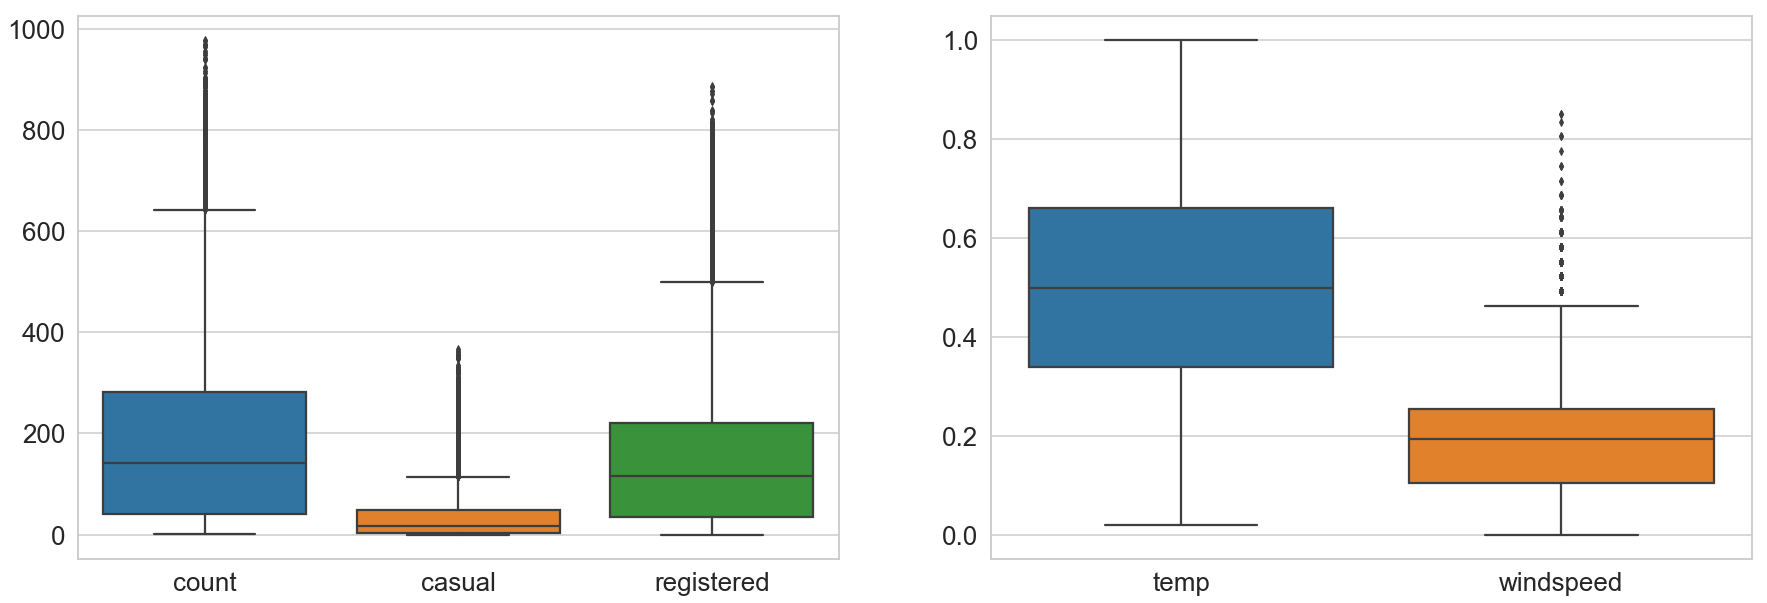

In [94]:
fig,(ax1,ax2)= plt.subplots(ncols=2)
sns.boxplot(data=data[['count',
                         'casual','registered']],ax=ax1)
sns.boxplot(data=data[['temp','windspeed']],ax=ax2)

# Correlations

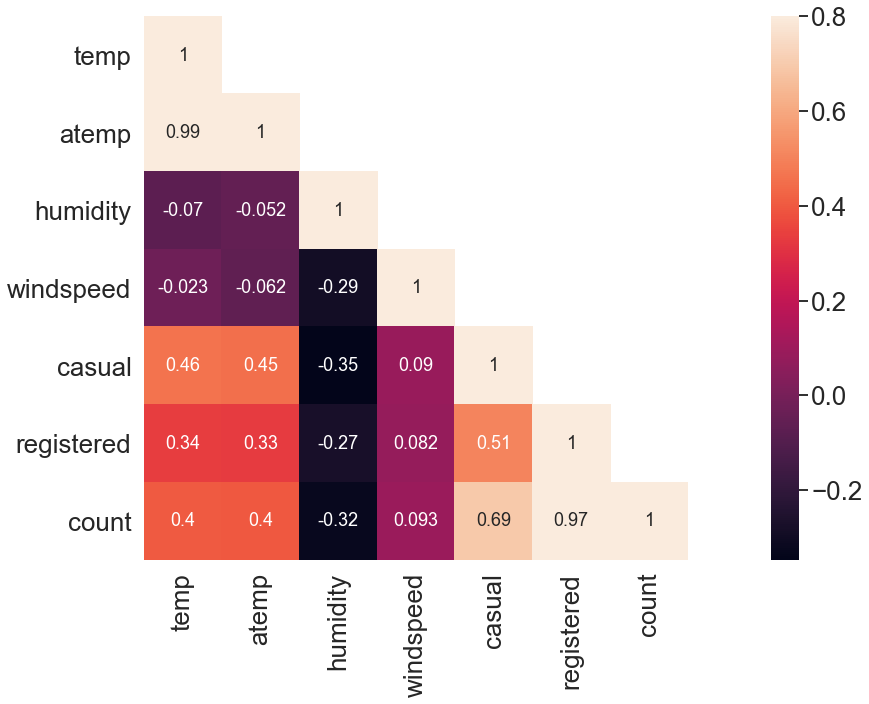

In [95]:
corrMatt = data[["temp","atemp",
                    "humidity","windspeed",
                    "casual","registered",
                    "count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

#correlation between temp and atemp high

In [96]:
# modeling utilities
from sklearn import tree
from sklearn import metrics
from sklearn import preprocessing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# Encoding of categorical value

In [97]:
def fit_transform_ohe(df,col_name):
     # label encode the column
    le = preprocessing.LabelEncoder()
    le_labels = le.fit_transform(df[col_name])
    df[col_name+'_label'] = le_labels
    
     # one hot encoding
    ohe = preprocessing.OneHotEncoder()
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return le,ohe,features_df

In [98]:
def transform_ohe(df,le,ohe,col_name):
    # label encode
    col_labels = le.transform(df[col_name])
    df[col_name+'_label'] = col_labels
    
    # ohe 
    feature_arr = ohe.fit_transform(df[[col_name+'_label']]).toarray()
    feature_labels = [col_name+'_'+str(cls_label) for cls_label in le.classes_]
    features_df = pd.DataFrame(feature_arr, columns=feature_labels)
    
    return features_df

In [99]:
data.head()

,id,date,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [100]:
data.drop(["date"],axis=1,inplace=True)

In [101]:
#choosing x and y
x=data.drop('count',axis=1)
y=data['count']

In [102]:
x.shape,y.shape

((17379, 15), (17379,))

In [103]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [104]:
#splitting the data into test and train
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.22, random_state = 42)

In [105]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(13555, 15)
(3824, 15)
(13555,)
(3824,)


In [106]:
dtr = DecisionTreeRegressor(max_depth=4,
                            min_samples_split=5,
                            max_leaf_nodes=10)
dtr.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=10, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [107]:
dtr.score(x,y)

0.9567636269202436

# Grid Search CV

In [137]:
param_grid = {"criterion": ["mse", "mae"]
                 }

In [138]:
dt= DecisionTreeRegressor()

In [139]:
grid_cv_dtr = GridSearchCV(dt, param_grid, cv=5)

In [140]:
grid_cv_dtr.fit(x,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ['mse', 'mae']}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

# cross validation best model details

In [141]:
print("R-Squared::{}".format(grid_cv_dtr.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtr.best_params_))

R-Squared::0.9986611987056978
Best Hyperparameters::
{'criterion': 'mse'}


In [142]:
r2_scores = cross_val_score(grid_cv_dtr.best_estimator_, x, y, cv=10)
mse_scores = cross_val_score(grid_cv_dtr.best_estimator_, x, y, cv=10,scoring='neg_mean_squared_error')

In [143]:

print("avg R-squared::{}".format(np.mean(r2_scores)))
print("MSE::{}".format(np.mean(mse_scores)))

avg R-squared::0.9990233302599891
MSE::-31.127899013748685


In [144]:
grid_cv_dtr.score(x,y)

1.0

In [146]:
from sklearn.externals import joblib

In [148]:
joblib.dump(grid_cv_dtr, "Project25_bike_sharing.pkl")

['Project25_bike_sharing.pkl']

In [149]:
x= joblib.load("Project25_bike_sharing.pkl")

In [150]:
x.predict(x_test)

array([425.,  88.,   4., ..., 322.,  73., 216.])